# Descriptive Statistics Snippets

### In this notebook we learn and practice simple statistics step by step.
<br>
First we are going to create an array of data. For that reason we can either use  the numpy module of Python.

In [213]:
# import modules
import numpy as np
from scipy.stats import moment
from scipy.stats import skew
import scipy.stats as stats
import matplotlib.pyplot as plt

### We randomly create some data.

In [214]:
# create 100 random entries from uniform [0,1] using numpy module

data1 = np.random.uniform(0, 1, 100)
# we don't use data1 in this example

In [215]:
# create 100 random entries from normal(mu=0, sigma=1) using numpy module

data = np.random.normal(0, 1, 100)

### Now we plot the data in a simple way just to view them.
<br>
We also draw lines for the mean and deviations.

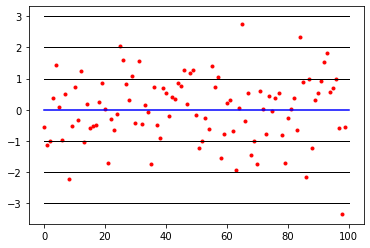

In [216]:
# plot the data
plt.plot(data, ".", color="red")
plt.plot([0,100],[0,0], color="blue")
plt.plot([0,100],[1,1], color="black", linewidth="1")
plt.plot([0,100],[-1,-1], color="black", linewidth="1")
plt.plot([0,100],[2,2], color="black", linewidth="1")
plt.plot([0,100],[-2,-2], color="black", linewidth="1")
plt.plot([0,100],[3,3], color="black", linewidth="1")
plt.plot([0,100],[-3,-3], color="black", linewidth="1")
plt.show()

### A nice and easy way to look how the data are distributed is the boxplot.
<br>
This gives us a quick idea about the mean, the variance, the shape of the distribution, and any extreme observations of the data.

{'whiskers': [<matplotlib.lines.Line2D at 0x6ffff3063210>,
 'caps': [<matplotlib.lines.Line2D at 0x6ffff3063a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x6ffff3ca7e10>],
 'medians': [<matplotlib.lines.Line2D at 0x6ffff3064350>],
 'fliers': [<matplotlib.lines.Line2D at 0x6ffff3064750>],
 'means': []}

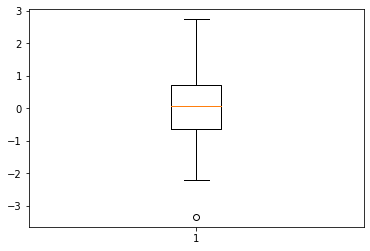

In [217]:
# we plot a boxplot
plt.boxplot(data)

### Now, let's see the minimum and the maximum observations.
<br>
We define a function to calculate the min, max and the range of data.

In [218]:
# compute the range i.e calculate the min and max and find their difference

def rng(data):
    r = max(data) - min(data)
    print(f"Range: {r:.4f}")
    print(f"Min: {min(data):.4f}")
    print(f"Max: {max(data):.4f}")
    return r, min(data), max(data)


In [219]:
rng(data)

Range: 6.0866
Min: -3.3481
Max: 2.7385


(6.08659018681146, -3.348076547564681, 2.7385136392467784)

### Calculate the measures of central tedency.
<br>
i.e. the mean, the mode, and the median.

In [222]:
# mean, mode, median

def mean_mode_median(data):
    try:
        mode_val = sts.mode(data)
    except sts.StatisticsError:
        mode_val = None

        median_val = sts.median(data)
        mean_val = np.mean(data)
    print(f"Mean: {mean_val:}")
    print(f"Mode: {mode_val:}")
    print(f"Median: {median_val:}")
    return mean_val, mode_val, median_val


In [223]:
mean_mode_median(data)

Mean: 0.009599679645903456
Mode: None
Median: 0.0760417759028448


(0.009599679645903456, None, 0.0760417759028448)

### Then we calculate some very useful values of our data, the moments.
<br>
The first moment is mostly known as the mean, the second moment is the variance,
<br>
the third and fourth moments are known as skewness ans kurtosis respectively.
<br>
These numbers describe the distribution the our data and their shape.
<br>
<br>
Below we can see more than one ways to calculate the moments.

In [224]:
# calculate the moments


# fisrt moment (mean)
mean = np.mean(data)
#mean = moment(data, moment=1)
#mean = sum(data)/len(data)

#second moment (variance)
variance = np.var(data)
#variance = moment(data, moment=2)
#variance = sum((x - mean) ** 2 for x in data) / len(data)

#third moment (skewness)
skewness = skew(data)
#skewness = moment(data, moment=3)
#skewness = np.mean((data - mean) ** 3) / (variance ** 1.5)

# fourth moment (kurtosis)
kurtosis = moment(data, moment=4)
#kurtosis = np.mean((data - mean) ** 4) / (variance ** 2)



# print the results with 4 decimal digits
print(f"Mean: {mean:.4f}")
print(f"Variance: {variance:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")


Mean: 0.0096
Variance: 1.1059
Skewness: -0.2307
Kurtosis: 4.0678


### Finally, let's see how our data are compared to the standard normal disrtibution.

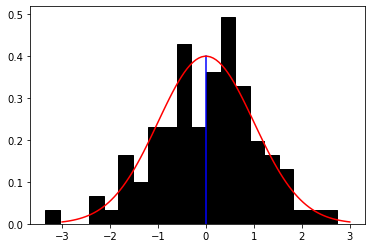

In [225]:
plt.hist(data, bins=20, color="black", edgecolor="black", density=True)
plt.plot([0,0],[0,0.3989], color="blue")

mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color="red")

plt.show()